In [1]:
# import libraries: 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import osmnx as ox

In [2]:
# Define the matrix:

conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "B", "C", "F", "D", "D", "C", "H","C","I","L","J","K","L"],
        "fin":    ["B", "C", "D", "F", "G", "B", "H", "H", "I","H","J","J","K","L","M"],
    }
)
conexiones

,inicio,fin
0,A,B
1,B,C
2,B,D
3,C,F
4,F,G
5,D,B
6,D,H
7,C,H
8,H,I
9,C,H


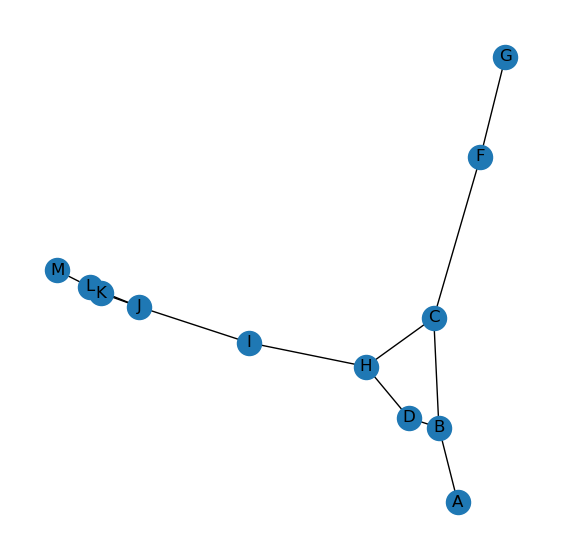

In [3]:
# Crear un grafo a partir de un Dataframe
# ======================================================================================
fig, ax = plt.subplots(figsize=(7,7))
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin")
nx.draw(G, with_labels=True, ax=ax,pos=nx.spectral_layout(G))

In [4]:
matrix = nx.adjacency_matrix(G)
print(print(matrix))

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 4)	1
  (2, 6)	1
  (3, 1)	1
  (3, 6)	1
  (4, 2)	1
  (4, 5)	1
  (5, 4)	1
  (6, 2)	1
  (6, 3)	1
  (6, 7)	1
  (7, 6)	1
  (7, 8)	1
  (8, 7)	1
  (8, 9)	1
  (8, 10)	1
  (9, 8)	1
  (9, 10)	1
  (9, 11)	1
  (10, 8)	1
  (10, 9)	1
  (11, 9)	1
None


In [5]:
# lets import the data from the files: 
#df = pd.read_excel('/home/jdiego/Documents/Tesis_1/Datos/PM001-0, AV 10 DE AGOSTO Y AMERICA, 2019,NOV.xlsm')

In [6]:
#print(df)

#### Creating the matrix for traffic opt:

In [7]:
# First lets create an empty graph: 
traffic = nx.Graph()

In [8]:
# list for saving the nodes: 
nodes = []

# loop for the 34 nodes: 
for i in range(1,35):
    nodes.append(i)
    
# Adding nodes:
traffic.add_nodes_from(nodes)

# Defining nodes names:
node_name = {1: "Av. Eloy Alfero y De los Arupos",             2: "Av. Eloy Alfero y De los Eucaliptos", 
             3: "Av. Eloy Alfero y De las Higueras",           4: "Av. Eloy Alfaro y Juan de los Molineros", 
             5: "Av. Eloy Alfaro y De los Fresno",             6: "Av. 6 de Diciembre y De los fresnos",
             7: "Av. Eloy Alfaro y De los Pinos",              8: "Av. Eloy Alfaro y Ramon Borja", 
             9: "Av. Eloy Alfaro y De los Alamos",             10: "Av. Eloy Alfaro y De los perales", 
             11: "Av. Eloy Alfaro y De los Mortinos",          12: "Av. Eloy Alfaro y Jose Queri",
             13: "Av. Eloy Alfero y Av. Gaspar de Villarroel", 14: "Av.6 de Diciembre y Samuel Fritz", 
             15: "Av. 6 de Diciembre y El Inca",               16: "Av. 6 de diembre y Pio valdiviedo", 
             17: "Av. 6 de Diciembre y los Shyris",            18: "Av. 6 de diciembre y Rio coca",
             19: "Av. 6 de diciembre y Tomas de berlanga",     20: "Av. 6 de diciembre y De los Granados", 
             21: "Av. 6 de diciembre y Gaspar de villaroel",   22: "Av. Shyris y Rio coca", 
             23: "Av. Shyris y Tomas berlanga",                24: "Av. Shyris e Isla floreana",
             25: "Av. Shyris y Gaspar de villaroel",           26: "Av. Gaspara de villarroel e Isla San cristobal", 
             27: "Av. Amazonas y Gaspar de villarroel",        28: "Av. Amazonasa y Tomas de berlanga", 
             29: "Av. Rio coca e Isla san Cristobal",          30: "Av. Rio coca e Isla Marchena", 
             31: "Av. Rio coca y Eloy Alfaro",                 32: "Av. 10 de agosto y Falconi", 
             33: "Av. 10 de Agosto y Juan de Ascaray",         34: "Av. 10 de Agosto y America"}

# Defining edges: 
edges_conections=[(1,2),(2,3),(3,4),(4,5),(5,6),(5,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(14,15),(15,16),
                  (16,17),(17,18),(18,19),(19,20),(20,21),(21,13),(21,25),(22,18),(22,23),(23,24),(24,25),(25,26),
                 (26,27),(27,28),(28,23),(23,19),(29,22),(30,18),(30,31),(31,12),(31,11),(32,33),(32,34)]

traffic.add_edges_from(edges_conections)
# Defining lenths:
#edge_length = {
    #(1,2): "517m", (2,3): "36m", (3,4): "1310.0m", (4,5): "577m",
    #(5,6): "390m",(5,7):"264m" ,(7,8):"513m" ,(8,9): ,(9,10): ,(10,11): }

nx.set_node_attributes(traffic, node_name, name="Nombre")

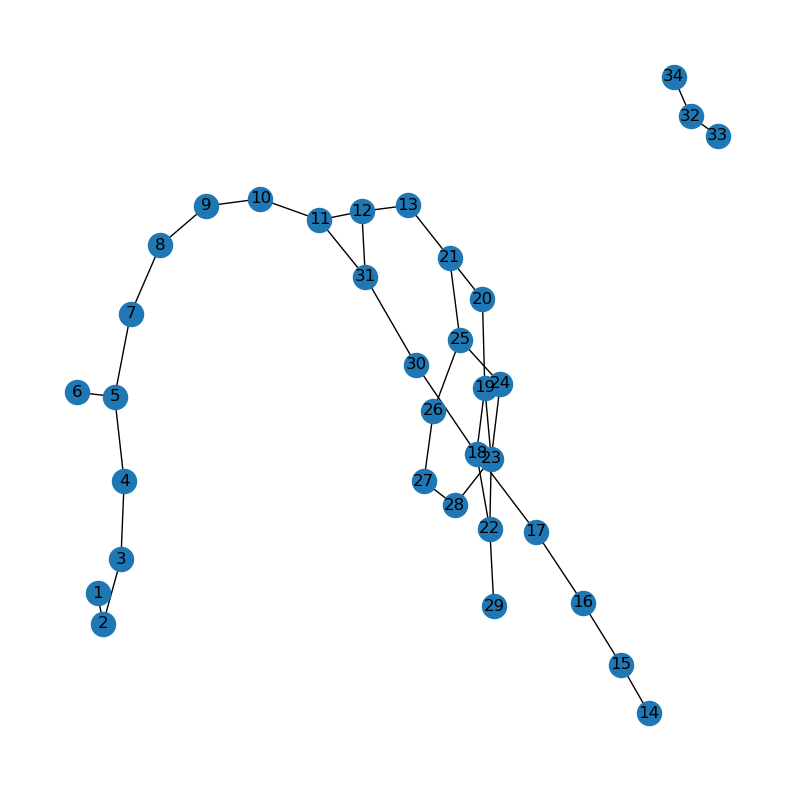

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(
    traffic, with_labels=True
)

In [10]:
#print(nodes)

In [11]:
matrix = nx.adjacency_matrix(traffic)
print(print(matrix))

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 4)	1
  (6, 4)	1
  (6, 7)	1
  (7, 6)	1
  (7, 8)	1
  (8, 7)	1
  (8, 9)	1
  (9, 8)	1
  (9, 10)	1
  (10, 9)	1
  (10, 11)	1
  (10, 30)	1
  (11, 10)	1
  (11, 12)	1
  (11, 30)	1
  :	:
  (22, 18)	1
  (22, 21)	1
  (22, 23)	1
  (22, 27)	1
  (23, 22)	1
  (23, 24)	1
  (24, 20)	1
  (24, 23)	1
  (24, 25)	1
  (25, 24)	1
  (25, 26)	1
  (26, 25)	1
  (26, 27)	1
  (27, 22)	1
  (27, 26)	1
  (28, 21)	1
  (29, 17)	1
  (29, 30)	1
  (30, 10)	1
  (30, 11)	1
  (30, 29)	1
  (31, 32)	1
  (31, 33)	1
  (32, 31)	1
  (33, 31)	1
None


## Selecting location with dist = 4km

In [12]:
#new_point = -0.18303, -78.48465
G = ox.project_graph(ox.graph_from_point((-0.18303, -78.48465), dist=4000, network_type='drive'))
G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)

/home/jdiego/anaconda3/envs/ox/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


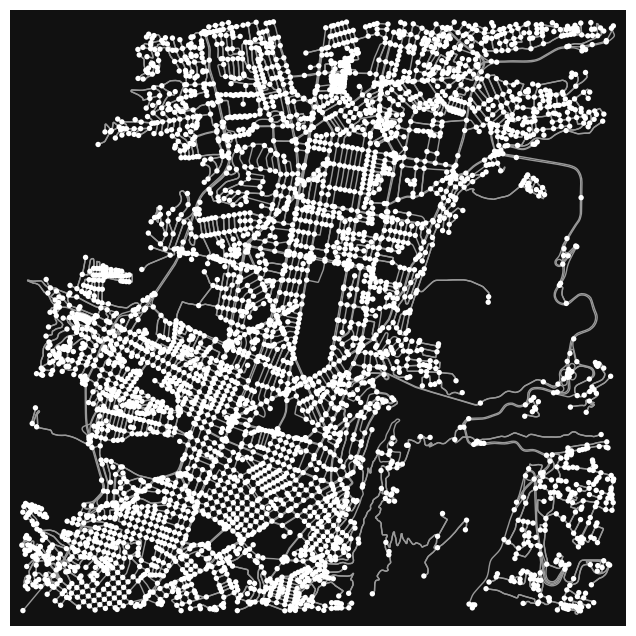

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [13]:
# Plotting the map: 
ox.plot_graph(G2)

In [14]:
# Getting the nodes:
len(G2.nodes)

4462

In [15]:
# Convert into data frame: 
data2 = nx.to_pandas_edgelist(G2)

In [16]:
data2

,source,target,name,u_original,lanes,highway,tunnel,reversed,maxspeed,osmid,ref,bridge,oneway,width,access,junction,length,v_original,geometry
0,0,1,Avenida Mariscal Sucre,261691862,3,primary,NaN,False,70,"[1173168249, 1173168250, 24379155, 531442414]",NaN,yes,True,NaN,NaN,NaN,60.973000,264520303,LINESTRING (778763.04531162 -17871.37938608112...
1,1,1006,Avenida Mariscal Sucre,264520303,3,primary,NaN,False,70,531630771,NaN,NaN,True,NaN,NaN,NaN,186.282000,264520456,LINESTRING (778749.4194812779 -17812.242535376...
2,1,1007,NaN,264520303,1,primary_link,NaN,False,NaN,24379159,NaN,NaN,True,NaN,NaN,NaN,164.881000,2600844383,LINESTRING (778749.4194812779 -17812.242535376...
3,2,3,Avenida Mariscal Sucre,261691962,3,primary,NaN,False,90,24212067,NaN,NaN,True,NaN,NaN,NaN,92.245000,264550815,LINESTRING (778117.5463444879 -19427.903397950...
4,2,4,Mañosca,261691962,NaN,tertiary,NaN,False,NaN,24381370,NaN,NaN,True,NaN,NaN,NaN,71.609943,264550811,LINESTRING (778117.5463444879 -19427.903397950...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,4459,4458,NaN,11182853625,NaN,residential,NaN,False,NaN,1206830656,NaN,NaN,False,NaN,NaN,NaN,41.400000,11182853622,LINESTRING (782076.6570371224 -24147.941814584...
9909,4459,4461,NaN,11182853625,NaN,residential,NaN,True,NaN,1206830657,NaN,NaN,False,NaN,NaN,NaN,49.626000,11182853629,LINESTRING (782076.6570371224 -24147.941814584...
9910,4460,4459,NaN,11182853626,NaN,residential,NaN,True,NaN,1206830657,NaN,NaN,False,NaN,NaN,NaN,27.740000,11182853625,LINESTRING (782104.4360524877 -24148.610332293...
9911,4461,3664,Avenida Simón Bolívar,11182853629,3,trunk,NaN,False,90,"[535571841, 24783870]",NaN,NaN,True,NaN,NaN,NaN,1018.589000,300220473,LINESTRING (782028.1621450533 -24138.352305944...


In [17]:
# Gettin the nodes we have: 

# Node 14:"Av. 6 de Diciebre y Samuel fritz"
Node_1 = ox.project_graph(ox.graph_from_point((-0.15191, -78.47645), dist=400, network_type='drive'))
Node_1p = ox.consolidate_intersections(Node_1, tolerance=10, rebuild_graph=True, dead_ends=True)

/home/jdiego/anaconda3/envs/ox/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


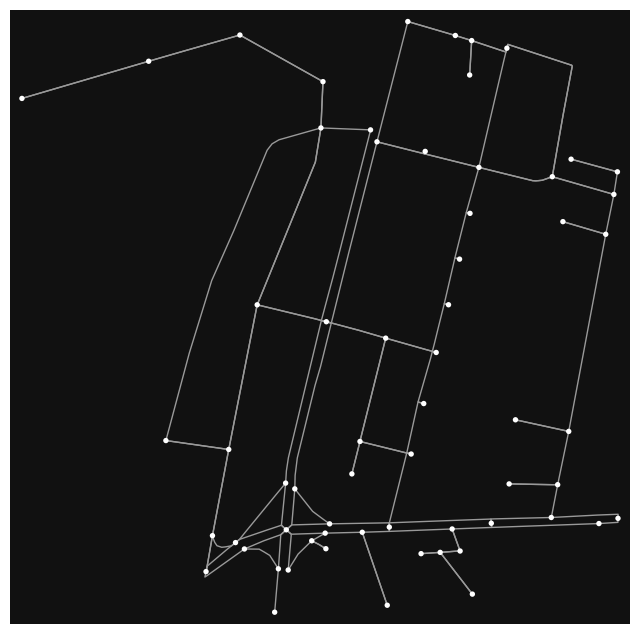

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
# Plotting the map of the  400m around the node we look for: 
ox.plot_graph(Node_1p)

In [19]:
# Convert into data frame: 
data3 = nx.to_pandas_edgelist(Node_1p)
# Fileterinf the data: 
filtered_data3_name = data3.loc[data3['name'] == 'Avenida 6 de Diciembre']
filtered_data3_source = data3.loc[data3['source'] == 14]
filtered_data3_source

,source,target,name,u_original,lanes,highway,reversed,maxspeed,osmid,oneway,length,v_original,geometry
23,14,37,Samuel Fritz,4236115120,2,tertiary,False,40,424136998,False,81.793085,269572194,LINESTRING (780902.0950274431 -16809.479904951...
24,14,15,Avenida 6 de Diciembre,4236115120,3,primary,False,50,532208712,True,254.843755,269572089,LINESTRING (780902.0950274431 -16809.479904951...
25,14,42,Samuel Fritz,4236115121,2,tertiary,True,40,24812829,False,94.539689,269572213,LINESTRING (780902.0950274431 -16809.479904951...
26,14,29,Avenida 6 de Diciembre,4236115121,3,primary,False,50,422719333,True,228.117330,269572148,LINESTRING (780902.0950274431 -16809.479904951...


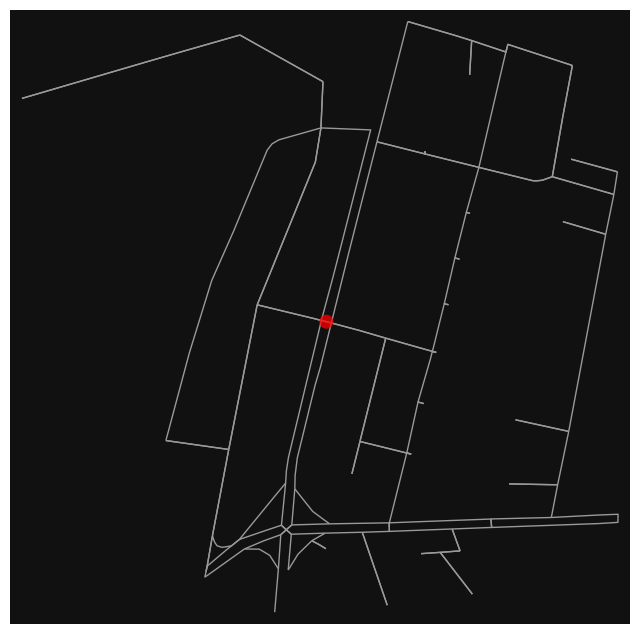

In [20]:
# Plottign the node 14: 
route0 = nx.shortest_path(Node_1p, 14, 14)

#Plot routes: 
fig, ax = ox.plot_graph_route(Node_1p, route0, route_linewidth=6, node_size=0)

In [21]:
#Define routes: 
route0 = nx.shortest_path(Node_1p, 14, 37)
route1 = nx.shortest_path(Node_1p, 14, 15)
route2 = nx.shortest_path(Node_1p, 14, 42)
route3 = nx.shortest_path(Node_1p, 14, 29)

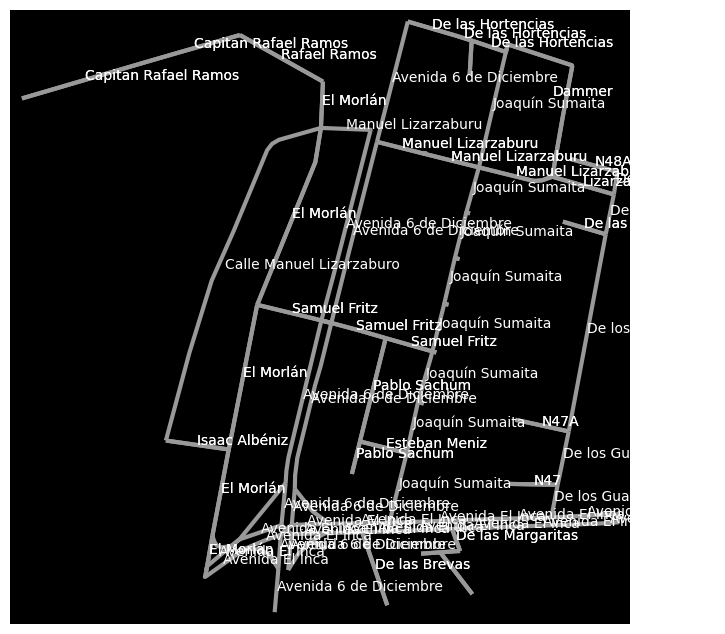

In [22]:
#Plot with names :

fig, ax = ox.plot_graph(Node_1p, bgcolor='k', edge_linewidth=3, node_size=0,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(Node_1p, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.annotate(text, (c.x, c.y), c='w')
plt.show()

In [23]:
#Convert into array:
data3_arr = np.array(data3['name'])
#print(data3_arr)
# check if name is in the array: 
#if 'Capitan Rafael Ramos' in data3_arr: 
#    print(1)
# Get the position of the object in the array
l= (np.where(data3 == 'Avenida 6 de Diciembre' )[0])
l1= (np.where(data3 == 'Samuel Fritz' )[0])
print(l,l1)

[ 11  13  16  18  22  24  26  28  53 108] [23 25 68 71 72 81]


In [24]:
# filter: 
for i in range(len(l)):
    print(data3["source"][l[i]] , data3["name"][l[i]])

6 Avenida 6 de Diciembre
6 Avenida 6 de Diciembre
8 Avenida 6 de Diciembre
10 Avenida 6 de Diciembre
13 Avenida 6 de Diciembre
14 Avenida 6 de Diciembre
14 Avenida 6 de Diciembre
15 Avenida 6 de Diciembre
29 Avenida 6 de Diciembre
56 Avenida 6 de Diciembre


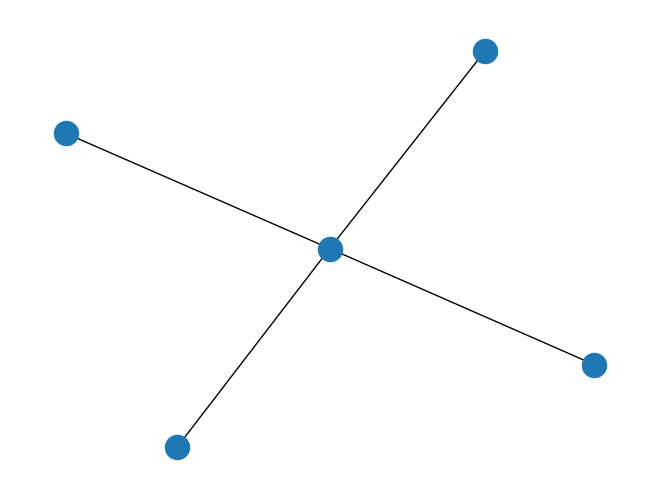

In [25]:
# Checkin plot with nx: 
G=nx.from_pandas_edgelist(filtered_data3_source)
nx.draw(G)

In [45]:
a = (Node_1p.nodes[37])
b = (Node_1p.nodes[15]) 
d = (Node_1p.nodes[42]) 
c = (Node_1p.nodes[28]) 

In [43]:
a.keys()

dict_keys(['osmid_original', 'y', 'x', 'street_count', 'lon', 'lat'])

In [46]:
lon1, lat1  = a["lon"] , a["lat"]
lon2, lat2  = b["lon"] ,b["lat"]
lon3, lat3  = c["lon"] , c["lat"] 
lon3, lat4  = d["lon"] , d["lat"]

In [51]:
# calcualtes the engle bwteeen the geodesic and north 
ox.bearing.calculate_bearing( lat1, lon1 , lat2 , lon2 )

357.4606511378064

numpy.float64

In [72]:
route0 = nx.shortest_path(Node_1p, 37, 37)
route1 = nx.shortest_path(Node_1p, 15, 15)
#route2 = nx.shortest_path(Node_1p, 15, 37)
route3 = nx.shortest_path(Node_1p, 42, 42)
route4 = nx.shortest_path(Node_1p, 29, 29)

routes = [route0, route1, route3 , route4 ]#, route2]

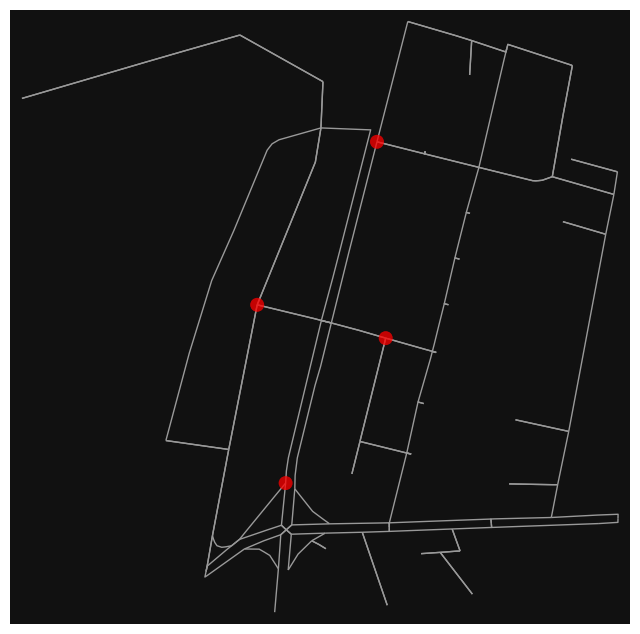

In [73]:
#Plot routes: 
fig, ax = ox.plot_graph_routes(Node_1p, routes, route_linewidth=6, node_size=0)